### Gender-Science EDA

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import glob
import seaborn as sns

sns.set(style="white")

In [25]:
all_dfs = []
savs = glob.glob("data/gender_science_data/Gender*.sav")

for s in savs:
    data = pd.read_spss(s)
    df_lst.append(data)

all_dfs = pd.concat(df_lst)    

In [26]:
all_dfs.count()

session_id        6019587
session_status    6019587
study_name        6019587
date              6019575
month             6019575
                   ...   
sius012             51942
birthsex           560895
genderidentity    1167552
occuself          1167552
occuselfdetail    1167552
Length: 189, dtype: int64

### Removing Irrelevant / Incomplete Data

In [27]:
list(all_dfs.columns)

['session_id',
 'session_status',
 'study_name',
 'date',
 'month',
 'day',
 'year',
 'hour',
 'weekday',
 'birthmonth',
 'birthyear',
 'num_002',
 'birthSex',
 'raceomb_002',
 'raceombmulti',
 'ethnicityomb',
 'edu',
 'edu_14',
 'D_biep.Male_Science_all',
 'Mn_RT_all_3467',
 'N_3467',
 'PCT_error_3467',
 'Order',
 'Side_Science_34',
 'Side_Male_34',
 'pct_300',
 'pct_400',
 'pct_2K',
 'pct_3K',
 'pct_4K',
 'arts',
 'science',
 'larts_7',
 'lscience_7',
 'factorability',
 'factordiscrimination',
 'factorencouragement',
 'factorfamily',
 'factorhighpower',
 'factorinterest',
 'genderIdentity',
 'goal1',
 'goal2',
 'ran9thboys',
 'ran9thgirls',
 'D_biep.Male_Science_36',
 'D_biep.Male_Science_47',
 'Mn_RT_all_3',
 'Mn_RT_all_4',
 'Mn_RT_all_6',
 'Mn_RT_all_7',
 'SD_all_3',
 'SD_all_4',
 'SD_all_6',
 'SD_all_7',
 'N_3',
 'N_4',
 'N_5',
 'N_6',
 'N_7',
 'Mn_RT_correct_3',
 'Mn_RT_correct_4',
 'Mn_RT_correct_6',
 'Mn_RT_correct_7',
 'SD_correct_3',
 'SD_correct_4',
 'SD_correct_6',
 'SD_cor

In [28]:
cols_to_drop = ['birthmonth', 
           'Mn_RT_all_3467',
           'N_3467', 
           'Order', 
          'Side_Science_34', 'Side_Male_34', 'factorability',
 'factordiscrimination',
 'factorencouragement',
 'factorfamily',
 'factorhighpower',
 'factorinterest', 'goal1',
 'goal2',
 'ran9thboys',
 'ran9thgirls',
 'D_biep.Male_Science_36',
 'D_biep.Male_Science_47',
 'Mn_RT_all_3',
 'Mn_RT_all_4',
 'Mn_RT_all_6',
 'Mn_RT_all_7',
 'SD_all_3',
 'SD_all_4',
 'SD_all_6',
 'SD_all_7',
 'N_3',
 'N_4',
 'N_5',
 'N_6',
 'N_7',
 'Mn_RT_correct_3',
 'Mn_RT_correct_4',
 'Mn_RT_correct_6',
 'Mn_RT_correct_7',
 'SD_correct_3',
 'SD_correct_4',
 'SD_correct_6',
 'SD_correct_7',
 'N_ERROR_3',
 'N_ERROR_4',
 'N_ERROR_6',
 'N_ERROR_7', 'MSANo', 'MSAName', 'iatevaluations001',
 'iatevaluations002',
 'iatevaluations003',
 'broughtwebsite',
 'user_id',
 'previous_session_id',
 'previous_session_schema', 'previat', 'major',
 'major2',
 'likeart',
 'likesci',
 'larts',
 'lscience',
 'genident',
 'goal3',
 'rancollmen',
 'rancollwomen',
 'scompactc',
 'scompsatm',
 'scompsatv', 'q2a',
 'q2b',
 'q2c',
 'q2d',
 'q3a',
 'q3b',
 'q3c',
 'q4',
 'larts_5',
 'lscience_5', 'ats3',
 'ats7',
 'ats8',
 'ats10',
 'extravert',
 'posaffect', 'att', 'deathanxiety001',
 'deathanxiety002',
 'deathanxiety003',
 'deathanxiety004',
 'deathanxiety005',
 'deathanxiety006',
 'deathanxiety007',
 'deathanxiety008',
 'deathanxiety009',
 'deathanxiety010',
 'deathanxiety011',
 'deathanxiety012',
 'deathanxiety013',
 'deathanxiety014',
 'deathanxiety015',
 'fearcovid001',
 'fearcovid002',
 'fearcovid003',
 'fearcovid004',
 'fearcovid005',
 'fearcovid006',
 'fearcovid007',
 'fearcovid008',
 'pvd001',
 'pvd002',
 'pvd003',
 'pvd004',
 'pvd005',
 'pvd006',
 'pvd007',
 'pvd008',
 'pvd009',
 'pvd010',
 'pvd011',
 'pvd012',
 'pvd013',
 'pvd014',
 'pvd015',
 'sius001',
 'sius002',
 'sius003',
 'sius004',
 'sius005',
 'sius006',
 'sius007',
 'sius008',
 'sius009',
 'sius010',
 'sius011',
 'sius012',]

In [29]:
all_dfs.session_status.count()

6019587

In [41]:
all_dfs.year.value_counts()

2020.0    817038
2017.0    598881
2018.0    586263
2016.0    568671
2015.0    524364
2005.0    350274
2014.0    271380
2012.0    257331
2013.0    243363
2006.0    227319
2009.0    222861
2007.0    211215
2019.0    208419
2011.0    204048
2004.0    200301
2010.0    195594
2008.0    185628
2003.0    146625
Name: year, dtype: int64

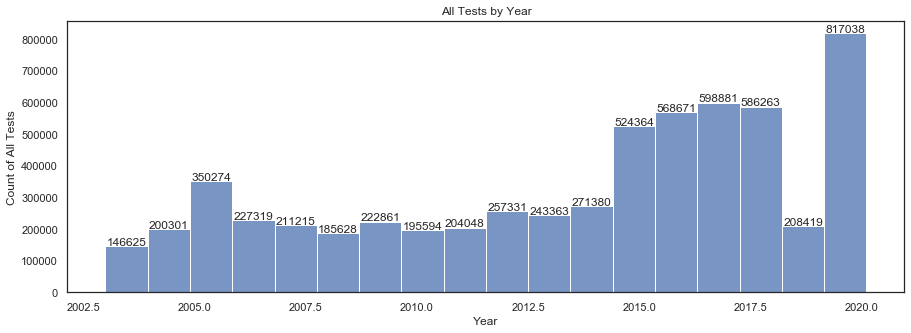

In [40]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(all_dfs.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='All Tests by Year', ylabel='Count of All Tests', xlabel='Year')
plt.show();

In [30]:
pass1 = all_dfs.copy()

In [31]:
pass1.drop(columns=cols_to_drop, inplace=True)

Only the completed tests: 

In [32]:
pass2 = pass1[pass1['session_status']=='C']

In [33]:
pass2.session_status.value_counts()

C    2915715
Name: session_status, dtype: int64

In [35]:
pct = 2915715 / 6019587 * 100
pct

48.43712699891205

In [36]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = (p.get_x() + p.get_width() / 2)
                _y = (p.get_y() + p.get_height()) + 3_000
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

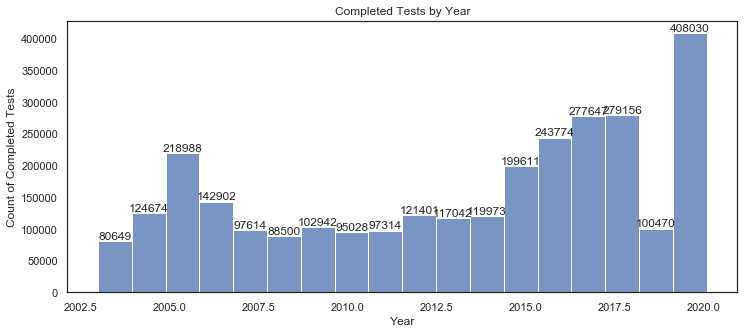

In [42]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(pass2.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

Fix education columns & combine

In [43]:
pass2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915715 entries, 2 to 189556
Data columns (total 56 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   session_id               float64 
 1   session_status           object  
 2   study_name               object  
 3   date                     float64 
 4   month                    float64 
 5   day                      float64 
 6   year                     float64 
 7   hour                     float64 
 8   weekday                  float64 
 9   birthyear                float64 
 10  num_002                  object  
 11  birthSex                 float64 
 12  raceomb_002              object  
 13  raceombmulti             object  
 14  ethnicityomb             object  
 15  edu                      float64 
 16  edu_14                   object  
 17  D_biep.Male_Science_all  float64 
 18  PCT_error_3467           float64 
 19  pct_300                  float64 
 20  pct_400                  

In [44]:
edu_df = pass2[['edu', 'edu_14', 'edu_13', 'edu_9']]

In [54]:
edu_dict = {1.0: 'elementary', 2.0: 'junior high', 3.0: 'some high school', 4.0: 'high school graduate', 5.0: 'some college', 6.0: 'associates degree', 7.0: 'bachelors degree', 8.0: 'some graduate school or beyond'}

In [87]:
pass2.edu.replace(to_replace=edu_dict, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [88]:
pass2.edu.value_counts()

some college                      730029
bachelors degree                  470623
9.0                               288764
some high school                  239570
high school graduate              206530
some graduate school or beyond    175274
associates degree                 174770
12.0                              146605
14.0                               44442
11.0                               31359
junior high                        28616
10.0                               26469
13.0                               18802
elementary                          5572
-999.0                                 6
Name: edu, dtype: int64

In [89]:
pass2.edu.replace(to_replace=[9.0, 10.0, 11.0, 12.0, 13.0, 14.0], value='some graduate school or beyond', inplace=True)

In [90]:
pass2.edu.value_counts()

some graduate school or beyond    731715
some college                      730029
bachelors degree                  470623
some high school                  239570
high school graduate              206530
associates degree                 174770
junior high                        28616
elementary                          5572
-999.0                                 6
Name: edu, dtype: int64

In [91]:
pass2.edu_14.replace(to_replace=["master's degree", "some graduate school", "Ph.D.", "M.B.A.", "M.D.", "J.D.", "other advanced degree"], value='some graduate school or beyond', inplace=True)

In [92]:
pass2.edu_14.replace(to_replace=["associate's degree"], value='associates degree', inplace=True)

In [93]:
pass2.edu_14.replace(to_replace=[-999.0], value='NaN', inplace=True)

In [94]:
pass2.edu_13.replace(to_replace=["master's degree", "some graduate school", "Ph.D.", "M.B.A.", "M.D.", "J.D.", "other advanced degree"], value='some graduate school or beyond', inplace=True)

In [95]:
pass2.edu_9.replace(to_replace=['?????'], value='NaN', inplace=True)

In [96]:
pass2.edu_9.value_counts()

some college            37098
associate's degree      14055
bachelor's degree        5985
some high school         5955
high school graduate     4512
some graduate school     2358
NaN                      2013
junior high               351
elementary school         129
Name: edu_9, dtype: int64

In [97]:
pass2.loc[:, 'edu'].fillna(pass2.edu_14, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [98]:
pass2.loc[:, 'edu'].fillna(pass2.edu_13, inplace=True)

In [99]:
pass2.loc[:, 'edu'].fillna(pass2.edu_9, inplace=True)

In [100]:
pass2.drop(columns=['edu_14', 'edu_13', 'edu_9'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
pass2.edu_bp.value_counts()

some graduate school or beyond    731715
some college                      730029
bachelors degree                  470623
some high school                  239570
high school graduate              206530
associates degree                 174770
junior high                        28616
elementary                          5572
-999.0                                 6
Name: edu_bp, dtype: int64

In [81]:
edu_df.edu.value_counts()

some graduate school or beyond    731715
some college                      730029
bachelors degree                  470623
some high school                  239570
high school graduate              206530
associates degree                 174770
junior high                        28616
elementary                          5572
-999.0                                 6
Name: edu, dtype: int64

In [105]:
pass2.edu_bp.replace(to_replace=[-999.0], value='NaN', inplace=True)

In [110]:
pass2.drop(columns='edu_bp', inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [111]:
pass2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915715 entries, 2 to 189556
Data columns (total 53 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   session_id               float64 
 1   session_status           object  
 2   study_name               object  
 3   date                     float64 
 4   month                    float64 
 5   day                      float64 
 6   year                     float64 
 7   hour                     float64 
 8   weekday                  float64 
 9   birthyear                float64 
 10  num_002                  object  
 11  birthSex                 float64 
 12  raceomb_002              object  
 13  raceombmulti             object  
 14  ethnicityomb             object  
 15  edu                      object  
 16  D_biep.Male_Science_all  float64 
 17  PCT_error_3467           float64 
 18  pct_300                  float64 
 19  pct_400                  float64 
 20  pct_2K                   

Errors Next

IF  (pct_300>10 OR PCT_error_3467>30) Error='Yes'.

In [113]:
err_df = pass2.copy()

In [115]:
err_df.drop(err_df.index[err_df['pct_300'] >10], inplace=True)

In [116]:
err_df.drop(err_df.index[err_df['PCT_error_3467'] >30], inplace=True)

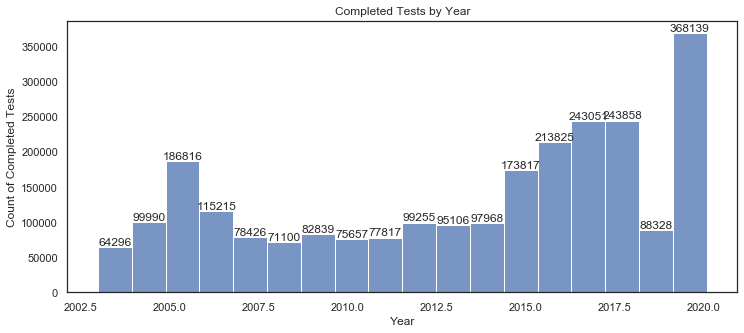

In [118]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(err_df.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

In [119]:
err_df.rename(columns={'D_biep.Male_Career_all': 'Implicit'}, inplace=True)

In [121]:
err_df.drop(columns=['PCT_error_3467', 'pct_300', 'pct_400', 'pct_2K', 'pct_3K', 'pct_4K'], inplace=True, axis=1)

In [122]:
err_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475503 entries, 2 to 189556
Data columns (total 47 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   session_id               float64 
 1   session_status           object  
 2   study_name               object  
 3   date                     float64 
 4   month                    float64 
 5   day                      float64 
 6   year                     float64 
 7   hour                     float64 
 8   weekday                  float64 
 9   birthyear                float64 
 10  num_002                  object  
 11  birthSex                 float64 
 12  raceomb_002              object  
 13  raceombmulti             object  
 14  ethnicityomb             object  
 15  edu                      object  
 16  D_biep.Male_Science_all  float64 
 17  arts                     category
 18  science                  category
 19  larts_7                  object  
 20  lscience_7               

In [123]:
err_df.drop(columns=['num', 'num_002'], inplace=True, axis=1)

#### Occupation Fixes

In [124]:
occu_df = err_df.copy()

In [133]:
occu_df[['occu_bp', 'occu_detail_bp']] = occu_df.occupation.str.split(pat=' - ', expand=True)

In [135]:
occu_df[['occu_bp', 'occu_detail_bp', 'occuSelf', 'occuSelfDetail', 'occuself', 'occuselfdetail']].to_csv('data/gsoccu.csv')

In [ ]:
# Fill na and fill up occu_bp 